打開圖片，處理圖片陣列

In [17]:
from PIL import Image
lena=Image.open("./lena.bmp")
width,height=lena.size
lena_arr=list(lena.getdata())

(a) a binary image (threshold at 128)

In [18]:
for i in range(len(lena_arr)):
    if lena_arr[i]>128:
        lena_arr[i]=255
    else:
        lena_arr[i]=0

In [19]:
binary_image = Image.new('L', (width, height))
binary_image.putdata(lena_arr)
binary_image.save('HW2_a.bmp')


HW2_a.bmp

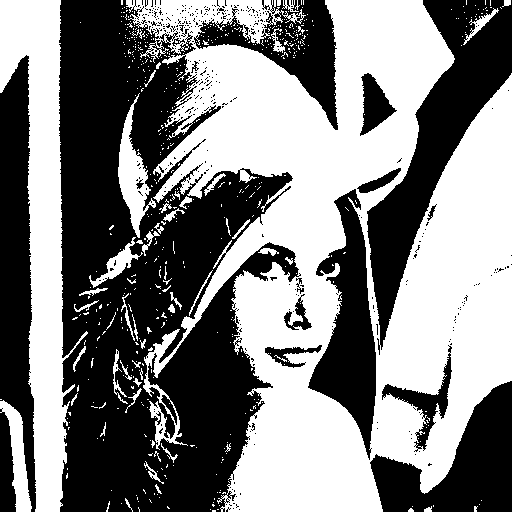

In [20]:
img = Image.open("HW2_a.bmp")
display(img)

(b) a histogram

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
lena=Image.open("./lena.bmp")
width,height=lena.size
lena_arr=list(lena.getdata())

HW2_b.jpg

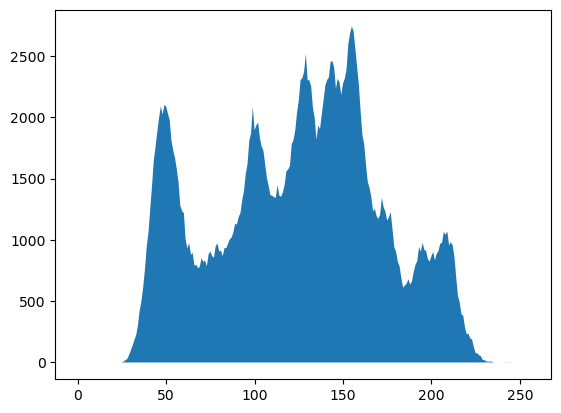

In [22]:
histogram = [0] * 256
for i in range(len(lena_arr)):
    histogram[lena_arr[i]]+=1

plt.fill(histogram)
plt.savefig('HW2_b.jpg', format='jpg')

(c) connected components(regions with + at centroid, bounding box)

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
lena=Image.open("./lena.bmp")
width,height=lena.size

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
lena=Image.open("./lena.bmp")
width,height=lena.size
lena_arr=list(lena.getdata())
width,height=lena.size

將圖片二值化存到matrix

In [25]:
matrix = [[0] * width for _ in range(height)]
for i in range(height):
    for j in range(width):
        matrix[i][j] = lena_arr[i * width + j] // 128

圖片處理完為０與１，因此label接續為２<br>
region為方框區域


In [26]:
label=2
region={}

row col 計算座標總和=>算重心<br>
region[label]算那個label區域的重心<br>
up down left right是方框邊界<br>
使用四連通


In [27]:
for i in range(height):
    for j in range(width):
        if matrix[i][j]==1:
            up=i
            down=i
            left=j
            right=j
            area=1
            stack=[(i,j)]
            row=i
            col=j
            while stack:
                h,w=stack.pop()
                matrix[h][w]=label
                up=min(up,h) #方匡上的邊界
                down=max(down,h) #方匡下的邊界
                left=min(left,w) #方匡左的邊界
                right=max(right,w) #方匡右的邊界
                area+=1 #面積
                row+=h  #列的座標加總
                col+=w  #行的座標加總
                #找尋上下左右
                for x,y in [(h+1,w),(h-1,w),(h,w-1),(h,w+1)]:       
                    if 0<=x<height and 0<=y<width and matrix[x][y]==1:
                        stack.append((x,y))
            #重心計算
            region[label]=(row//area,col//area,up,down,left,right,area) 
            label+=1 



題目說threshed是area>500

In [28]:
result=[]
for i,j in region.items():
    if j[6]>500:
        result.append(j)

In [29]:
import cv2
import numpy as np

In [30]:
hw2_a = np.array(binary_image)
HW2_c=np.array([[[i]*3 for i in j] for j in hw2_a])

In [31]:

for i in result:
    cv2.rectangle(HW2_c,(i[4],i[2]),(i[5],i[3]),(0, 0, 255),2)
    cv2.line(HW2_c, (i[1] - 5, i[0]), (i[1] + 5, i[0]), (255, 0, 0), 2)
    cv2.line(HW2_c, (i[1], i[0] - 5), (i[1], i[0] + 5), (255, 0, 0), 2)

HW3_c.bmp

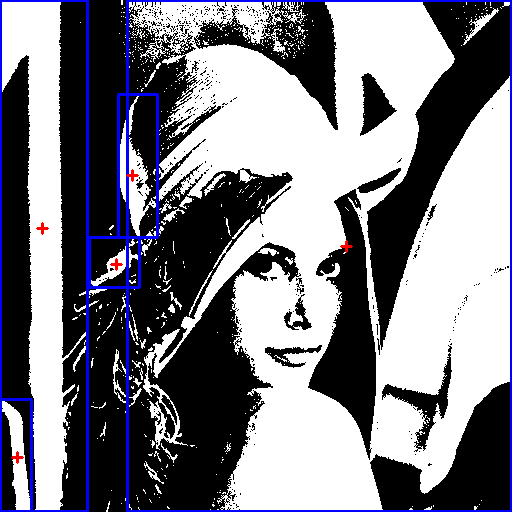

In [32]:
Image.fromarray(HW2_c).save("HW2_c.bmp")
img = Image.open("HW2_c.bmp")
display(img)
